# Análise da Evolução do vírus Covid19 em Pernambuco
## Michael Barney - mbgj
### Projeto da Disciplina Métodos Numéricos - 2020.3

Este projeto tem como objetivo analisar a progressão da epidemia da doença coronavírus (Covid-19) no estado de Pernambuco entre Fevereiro e Novembro de 2020. Para isto, seráão utilizados modelos de previsão baseados em equações diferenciais, desde o modelo mais simples SIRD (Susceptíveis, Infectados, Recuperados e Mortos) até um mais realista, levando em conta infectados assintomáticos e taxas de isolamento social.

Nesta análise, será verificado:

1. Se o modelo final apresentado possui um resultado similar à evolução real do vírus no estado de Pernambuco. 
2. Quais foi o impacto das medidas de distanciamento social.os impactos do distanciamento social na progressão do víus.
3. Os efeitos de uma "segunda onda" do vírus.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

## Parte 1 - O Modelo SIRD

O modelo SIRD (Susceptível-Infectado-Recuperado-Morto) mapea o avanço de um vírus através do calculo de pessoas **susceptiveis** (que ainda podem ser infectadas), **infectadas** (que podem transmitir vírus), **recuperados** (que sobreviveram à doença e que agora estão imunes) e mortos (que morreram devido à doença provocada pelo vírus).

Para fazer esta análise sobre o Covid-19 sobre a população de pernambuco, precisamos primeiro de alguns dados:

In [105]:
# População Total de Pernambuco: 9.6 milhões (IGBE, 2020) [1]
N = 9.278 * 1000000

Levaremos em consideração que o número de infectados iniciais será apenas referente à primeira notificação oficial feita, de um casal no dia 12 de março [2]. Devido à característica de crecimento exponencial inicial do vírus, pequenas mudanças em cima deste valor não acarretam em grandes mudanças nos resultados finais.

In [106]:
I0 = 2 # Pessoas Infectadas Iniciais

Vamos também definir que inicialmente não havia nenhuma pessoa recuperada ou morta por causa do Covid19

In [107]:
R0 = 0 # Pessoas recuperas Iniciais
D0 = 0 # Pessoas mortas Iniciais

Assim temos que o número de pessoas **Susceptiveis** é igual à toda a população, menos as pessoas infectadas, recuperadas e mortas.


In [108]:
S0 = N - I0 - R0 - D0 

Agora, precisamos de alguns dados característicos ao vírus.

O primeiro dado necessário é um valor β (**beta**) que represente o número médio de contatos que são suficientes para a transmissão de uma pessoa sobre um dia. 

Em seguida, precisamos de um valor γ (**gamma**) que represente a probabilidade de uma pessoa se recuperar da doença. Esse valor é calculado como sendo 1/(número médio de dias para uma pessoa se recuperar).

Finalmente, será nesessário um valor ρ (**mi**) que represente a probabilidade de uma pessoa infectada com o vírus falecer.

Para os fins desta análise, será usado os valores obtidos por Saulo e Daniel em sua análise do Covid19 no Brasil feita em Junho de 2020 [2]. Nesta análise, os pesquisadorees usaram os dados reais informados pelas secretarias estaduais do Brasil para estimar estes parâmetros, sendo eles:

In [109]:
beta = 0.4417 # Chance de Transmitir
gamma = 0.1508 # média de 6.6 dias para se recuperar.
mi = 0.0292 # 2.9% de chance de falecer

Ok! Tudo pronto para começar a usar este primeiro modelo. Vamos execulálo sobre um período de 270 dias, sendo aproximadamente equivalente ao período de Março (quando ocorreu a primeira notificação de uma pessoa infectada em Pernambuco) a Novembro (a data atua)

In [110]:
dias = 270
t = np.linspace(0, 270, 270)

A função deriv apresentada a seguir será a responsável por calcular o avanço do vírus durante o período estabelecido aplicando uma série de equações:

In [111]:
def deriv (y, t, beta, gamma, mi):
  S, I, R, D = y

  N = S + I + R # atualizacao da população total, sem o número de mortos

  dSdt = -beta*S*I/N                   # variação do número de pessoas susceptiveis
  dIdt = beta*I*S/N - gamma*I/(1 - mi) # variação do número de pessoas infectadas
  dRdt = gamma*I                       # variação do número de pessoas recuperadas
  dDdt = mi/(1 - mi)*gamma*I           # variação do número de pessoas mortas

  return dSdt, dIdt, dRdt, dDdt

As equações diferenciais serão resolvidas com o pacote **Scipy.integrate**, usando a função **odeint**, os valores iniciais do vírus e as equações definidas em **deriv**.

In [112]:
y0 = S0, I0, R0, D0                                # valor inicial do vetor
ret = odeint(deriv, y0, t, args=(beta, gamma, mi)) # realização dos cálculos
S, I, R, D = ret.T                                 # resultados

O seguinte gráfico mostra os resultados destes cálculos:



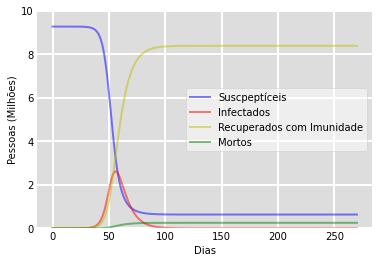

In [113]:
escala = 1000000

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/escala, 'b', alpha=0.5, lw=2, label='Suscpeptíceis')
ax.plot(t, I/escala, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/escala, 'y', alpha=0.5, lw=2, label='Recuperados com Imunidade')
ax.plot(t, D/escala, 'g', alpha=0.5, lw=2, label='Mortos')

ax.set_xlabel('Dias')
ax.set_ylabel('Pessoas (Milhões)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Inicialmente, vemos que houve um pico de infectados perto do dia 50 (aproximadamente no meio de Maio), rapidamente diminuindo em seguida.

Vamos ver também os dados do último dia análisado:

In [114]:
print("Susceptíveis:", math.floor(S[dias-1]))
print("Infectados:", math.floor(I[dias-1]))
print("Recuperados", math.floor(R[dias-1]))
print("Mortos", math.floor(D[dias-1]))

Susceptíveis: 631976
Infectados: 0
Recuperados 8393559
Mortos 252463


Percebemos então um resultado impressionante (e provaelmente irrealista). Vemos que o número de pessoas Infectadas é igual a 0, garantindo assim que mais ninguém poderá ser infectado pelo vírus. Além disso, o número de mortos é igual a aproximadamente **250 mil pessoas**!

Vamos então comparar com os dados reais da progressão do vírus em Pernambuco, obtidos do site **Brasil.io** [4], que compila diariamente boletins epidemiológicos das secretarias estaduais de saúde:

![casos e óbitos confirmados acumulados por dia](https://i.imgur.com/YXw4IJ7.png)
![casos e óbitos confirmados por dia](https://i.imgur.com/AB9QNl3.png)

Vemos então que realmente os dados obtidos na análise com o modelo SIRD não estão corretos. Temos um número de óbitos no valor de aproximadamente 9 mil e um número de casos confirmados crescendo lentamente, e não repetinamente.

Isto pode ser causado por alguns fatores, o fato de que diariamente pessoas entrem e saiam do estado, por exemplo, tornará muito difícil o número de pessoas infectadas chegar a zero.

Além disso, existem outros dois fatores que ajudaram ao crescimento real ser mais lento e com um pico menor, o fato do Covid19 poder infeccionar uma pessoa de forma assintomática e os esforços realizados para aumentar o distanciamento social. A seguir, vamos apresentar outros modelos que levam em conta estes fatores.

## Parte 2 - O Modelo SIRASD
O modelo SIRASD (Susceptível-Infectado-Recuperado-Assintomático-Sintomático-Morto) promove um avanço em relação ao modelo anterior ao distinquir entre uma pessoa infectada **sintomática** (que apresenta sintomas) e **assintomática** (que não apresenta sintomas).

Para fazer essa análise, precisaremos ajustar os valores de **Beta** e **Gamma** para que sejam de acordo com a transmissão e recuperação adequada. 

Além disso, será introduzido um parâmetro p, que representa a proporção de pessoas infectadas que desenvolvem sintomas.

Novamente, os dados utilizados foram obtidos por Saulo e Daniel em sua análise do Covid19 no Brasil feita em Junho de 2020 [2]

In [115]:
BetaS = 0.4417    # Chance de uma pessoa infectada Sintomática Transmitir
BetaA = 0.4417    # Chance de uma pessoa infectada Assintomática Transmitir

GammaS = 0.1508   # 6.6 dias para uma pessoa sintomática se Recuperar
GammaA = 0.12     # 8.3 dias para uma pessoa assintomática se Recuperar

p = 0.32          # 32% das pessoas infectadas desenvolvem sintomas

t = np.linspace(0, dias, dias)

A função **deriv** agora também será adaptada para calcular de forma distinta as pessoas sintomáticas e assintomáticas:

In [116]:
def deriv (y, t, BetaA, BetaB, GammaA, GammaB, mi, p):
  S, Ia, Is, Ra, Rs, D = y

  N = S + Ia + Is + Ra + Rs
  
  dSdt = -(BetaA*Ia + BetaS*Is)*S/N                            # variação do número de pessoas susceptiveis                   
  dIadt = (1 - p)*(BetaA*Ia + BetaS*Is)*S/N - GammaA*Ia        # variação do número de pessoas infectadas assintomáticas
  dIsdt = p*(BetaA*Ia + BetaS*Is)*S/N - GammaS*Is/(1 - mi)     # variação do número de pessoas infectadas sintomáticas
  dRadt = GammaA*Ia                                            # variação do número de pessoas recuperadas assintomáticas
  dRsdt = GammaB*Is                                            # variação do número de pessoas recuperadas sintomáticas
  dDdt = mi/(1 - mi)*GammaS*Is                                 # variação do número de pessoas que morreram
  return dSdt, dIadt, dIsdt, dRadt, dRsdt, dDdt

Agora é só realizar os cálculos para obter o novo gráfico e dados finais:


In [117]:
y0 = S0, I0, I0, R0, R0, D0 # valor inicial do vetor
ret = odeint(deriv, y0, t, args=(BetaA, BetaS, GammaA, GammaS, mi, p))
S, Ia, Is, Ra, Rs, D = ret.T

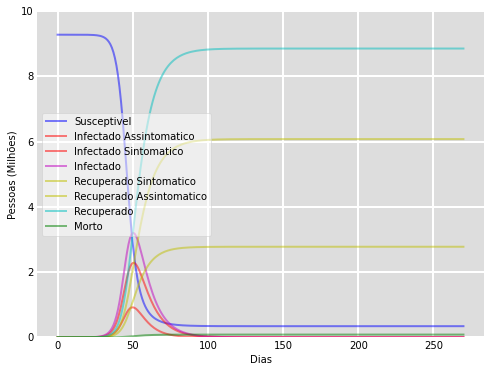

In [118]:
scale = 1000000

fig = plt.figure(facecolor='w', figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/scale, 'b', alpha=0.5, lw=2, label='Susceptivel')
ax.plot(t, Ia/scale, 'r', alpha=0.5, lw=2, label='Infectado Assintomatico')
ax.plot(t, Is/scale, 'r', alpha=0.5, lw=2, label='Infectado Sintomatico')
ax.plot(t, (Ia+Is)/scale, 'm', alpha=0.5, lw=2, label='Infectado')
ax.plot(t, Ra/scale, 'y', alpha=0.5, lw=2, label='Recuperado Sintomatico')
ax.plot(t, Rs/scale, 'y', alpha=0.5, lw=2, label='Recuperado Assintomatico')
ax.plot(t, (Ra + Rs)/scale, 'c', alpha=0.5, lw=2, label='Recuperado')
ax.plot(t, D/scale, 'g', alpha=0.5, lw=2, label='Morto')

ax.set_xlabel('Dias')
ax.set_ylabel('Pessoas (Milhões)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [119]:
print("Susceptíveis:", math.floor(S[dias-1]))
print("Infectados:", math.floor(Ia[dias-1] + Is[dias-1]))
print("Recuperados Assintomáticos:", math.floor(Ra[dias-1]))
print("Recuperados Sintomáticos:  ", math.floor(Rs[dias-1]))
print("Mortos:", math.floor(D[dias-1]))

Susceptíveis: 341064
Infectados: 0
Recuperados Assintomáticos: 6077116
Recuperados Sintomáticos:   2776313
Mortos: 83506


Assim, vemos já que o número de pessoas que morreram já diminuiu bastante, visto que a maioria das pessoas que são infectadas não desenvolvem sintomas, portanto não tem como falecer. Também vemos que o número de pessoas susceptíveis no final aumentou bastante, tendo menos pessoas infectadas.

Porém, o pico da curva ainda está muito elevado e tem uma variação muito rápida, pois ainda não estamos levando em conta o fator do distanciamento social, que será visto a seguir.

## Parte 3 - Modelo SIRASD levando em conta o Distanciamento Social

A fim levar em conta o distanciamento social, precisaremos de alguma informação que represente o quanto a população de distanciou para se proteger do Covid19.

Para isso, usaremos o **Índice de Isolamento** fornecido pela **Inloco** [5] referente aos meses de Março à Novembro. Este índice varia de 0% a 100%, sendo 0% um estado com nenhum isolamento (que nunca ocorre) e 100% um isolamento total (impraticável na realidade).

A seguir mapeamos estes dados:


In [120]:
# Índice do primeiro dia de cada mes a partir de março de 2020
indiceDeIsolamento = [
                        42.2, #março
                        50.8, #abril
                        51.8, #maio
                        44.2, #junho
                        39.7, #julho
                        37.2, #agosto
                        35.7, #setembro
                        35.4, #outubro
                        34.6, #novembro
                      ]

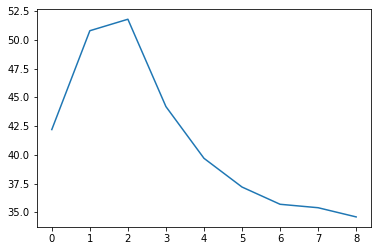

In [121]:
plt.plot(indiceDeIsolamento) # plotting by columns
plt.show()

Observamos que houve um pico do Isolamento entre maio e junho, diminuindo em seguida. 

Para a função **deriv**, precisaremos calcular um parâmetro ψ (**psi**) a partir do indice de isolamento. Este parâmetro servirá para multiplicar os fatores de infecção de maneira que diminua a taxa de contágio do virus de acordo com o índice de isolamento.

psi será calculado como um valor entre **0** (quando houver 100% de isolamento, tornando a taxa de infecção igual a 0) e **1** (quando houver 0% de isolamento, tornando a infecção descontrolada)

In [122]:
def deriv (y, t, BetaA, BetaB, GammaA, GammaB, mi, p):
  S, Ia, Is, Ra, Rs, D = y
  N = S + Ia + Is + Ra + Rs
  
  mes = math.floor(t/30.0) # março = 0, abril = 1... novembro = 9
  if mes >= 9: mes = 8
  psi = (100 - indiceDeIsolamento[mes])/100

  dSdt = -(psi*BetaA*Ia + psi*BetaS*Is)*S/N
  dIadt = (1 - p)*(psi*BetaA*Ia + psi*BetaS*Is)*S/N - GammaA*Ia
  dIsdt = p*(psi*BetaA*Ia + psi*BetaS*Is)*S/N - GammaS*Is/(1 - mi)
  dRadt = GammaA*Ia
  dRsdt = GammaB*Is
  dDdt = mi/(1 - mi)*GammaS*Is

  return dSdt, dIadt, dIsdt, dRadt, dRsdt, dDdt

In [123]:
y0 = S0, I0, I0, R0, R0, D0 # valor inicial do vetor
ret = odeint(deriv, y0, t, args=(BetaA, BetaS, GammaA, GammaS, mi, p))
S, Ia, Is, Ra, Rs, D = ret.T

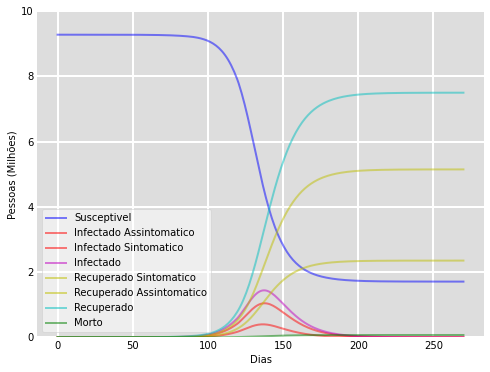

In [124]:
scale = 1000000

fig = plt.figure(facecolor='w', figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/scale, 'b', alpha=0.5, lw=2, label='Susceptivel')
ax.plot(t, Ia/scale, 'r', alpha=0.5, lw=2, label='Infectado Assintomatico')
ax.plot(t, Is/scale, 'r', alpha=0.5, lw=2, label='Infectado Sintomatico')
ax.plot(t, (Ia+Is)/scale, 'm', alpha=0.5, lw=2, label='Infectado')
ax.plot(t, Ra/scale, 'y', alpha=0.5, lw=2, label='Recuperado Sintomatico')
ax.plot(t, Rs/scale, 'y', alpha=0.5, lw=2, label='Recuperado Assintomatico')
ax.plot(t, (Ra + Rs)/scale, 'c', alpha=0.5, lw=2, label='Recuperado')
ax.plot(t, D/scale, 'g', alpha=0.5, lw=2, label='Morto')

ax.set_xlabel('Dias')
ax.set_ylabel('Pessoas (Milhões)')
ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [125]:
print("Susceptíveis:", math.floor(S[dias-1]))
print("Infectados:", math.floor(Ia[dias-1] + Is[dias-1]))
print("Recuperados Assintomáticos:", math.floor(Ra[dias-1]))
print("Recuperados Sintomáticos:  ", math.floor(Rs[dias-1]))
print("Mortos:", math.floor(D[dias-1]))

Susceptíveis: 1707501
Infectados: 193
Recuperados Assintomáticos: 5147786
Recuperados Sintomáticos:   2351782
Mortos: 70737


Observamos agora um resultado ainda mais similar à evlução real do vírus, com um pico menor e com ariação mais suave, tendo um ápice alguns dias depois. 

Vemos também que o número de pessoas infectadas está diferente de 0, pois o processo de evolução se tornou mais lento ao levar em conta o distanciamento.

Porém, apesar de o número de mortos ter diminuido, ainda está diferente em relação aos dados reais, que apontam para **9 mil mortos** ao invés de **61 mil**. Além disso, o número de recuperados sintomáticos apontam para **2 milhões**, enquanto os dados reais estimam **180 mil**.

Estas diferenças entre os dados podem ser devido à fatores como:
1. Sub-notificação de infecções e mortes
2. Uso intencivado de máscaras e outras medidas de proteção
3. Diferença na densidade populacional de cidades do estado

## Conclusão

A partir destas análises, vimos que os modelos de previsão de evolução de um vírus são capazes de apresentar uma **visão geral**, que se torna mais avançada e similar ao mundo real na medida que **mais informações são adicionada**s.

Apesar de levar em conta **infecções assintomáticas** e **medidas de isolamento** social, os resultados obtidos nestas análises ainda divergiram numericamente bastante aos resultados mensurados durante o ano pelas secretarias estaduais. 

Porém, **graficamente**, os resultados se assemelham muito aos dados reais, principalmente em relação ao periodo em que houve o pico de infecções. Podemos ver também, que os esforços feitos para aumentar o isolamento social levaram à uma **suavização de curva de infecção**, levando à um pico menor de infectados simultaneos e ainda diminuindo o número de mortos.

Futuramente, pode-se analisar os impactos de outros fatores como o uso de máscara e a densidade populacional do estado para tornar os resultados ainda mais precisos.

## Referências:

[1] IBGE 2020 - População de Pernambuco: https://www.ibge.gov.br/cidades-e-estados/pe.html

[2] Notificação dos primeiros casos de Covid19 em Pernambuco: https://www.folhape.com.br/noticias/casal-do-recife-sao-primeiros-casos-de-coronavirus-em-pernambuco/133219/

[3] Bastos, S.B., Cajueiro, D.O. Modeling and forecasting the early evolution of the Covid-19 pandemic in Brazil. Sci Rep 10, 19457 (2020). https://doi.org/10.1038/s41598-020-76257-1

[4] Dados epidemiológicos atualizados de Pernambuco: https://brasil.io/covid19/PE/

[5] Índice de Isolamento Social - Inloco: https://mapabrasileirodacovid.inloco.com.br/pt